### Summary of Notebook
- Our data is now ready for Exploratory Data Analyses after being processe by read and structure program utility
- We will check various statistics on the images such as total no of images , whether classes are balanced and display a few images with their bounding boxes for visulaization 


In [ ]:
# Import Genereal libs  libraries

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import pickle
import random
random.seed(101)
# Import project specific libs
import tarfile
import os
import matplotlib.image as img
import matplotlib.patches as patches

In [ ]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class EDA_Util:
  #This Utility class performs EDA on the input data

  #Constructor func
  def __init__(self):
    self.imageFilepath="/content/drive/MyDrive/Object_Localisation/Data_Set/images.tar.gz"
    self.ip_dataframe=pickle.load(open('/content/drive/MyDrive/Object_Localisation/Pickled_Data/IpDataFrame.pickle','rb'))
    print("# Shape #")
    print(self.ip_dataframe.shape)
    print("##########################################################################")
    print("# Sample Records #")
    print(self.ip_dataframe.sample(5))
    print("##########################################################################")
    

  def checkClassBalance(self):
    # There are 37 categogries of pets(different types of cats and dogs)
    # Lets check if the classes are in equal proportions
    temp_series=self.ip_dataframe['id'].value_counts()
    #print series sorted by the index , here the index is the 'id' or the 'class'
    seriesId=pd.Series(temp_series.index)
    seriesCount=pd.Series(temp_series)
    #Series count has an index that is each id , we need to reset the index to be able to add to a df later
    seriesCount.reset_index(inplace=True,drop=True)
    
    # create a temp df
    temp_df=pd.DataFrame(columns=['class','count'])
    temp_df['class']=seriesId
    temp_df['count']=seriesCount
    #we need to change datatype to int otherwise sorting wont work on df later
    temp_df['class']=temp_df['class'].astype(int)
    #print sorted values 
    print('#Each class and its count#')
    print(temp_df.sort_values(by=['class'],ascending=True,ignore_index=False))
    #NTS:Make ignore_index=True if you dont want to see the indexes of each row
    return

  def readImages(self):
    #Annotations file is in the form .tar.gz
    #Uncompress file & read file
    imgFile= tarfile.open(self.imageFilepath)
    destPathIndex=self.imageFilepath.rindex('/', 0 ,)
    destPathBase=self.imageFilepath[0:destPathIndex]
    #print(destPathBase)
    if(not os.path.exists(destPathBase+'/images/')):
      imgFile.extractall(destPathBase)
      imgFile.close()
    self.unzippedImagePath=destPathBase +'/images/'
    return


  def visualizeImages(self):
    #Choose 2 images Randomly & Display image with bounding box and label
    fig , ax = plt.subplots(1,2)
    for i in np.arange(0,2,1):
      random.seed(i)
      genRandNum= random.randint(0,3670)
      imageName=self.ip_dataframe.iloc[genRandNum]['image_name']
      imageNamePath=imageName
      image=img.imread(self.unzippedImagePath + imageName +'.jpg')
      print("##########################################################################")
      print('imageNamePath',imageNamePath)
      xmin=self.ip_dataframe.iloc[genRandNum]['xmin']
      xmax=self.ip_dataframe.iloc[genRandNum]['xmax']
      ymin=self.ip_dataframe.iloc[genRandNum]['ymin']
      ymax=self.ip_dataframe.iloc[genRandNum]['ymax']
      label=self.ip_dataframe.iloc[genRandNum]['id']
      print('coordinates  :',xmin,xmax,ymin,ymax)
      print('label  :',label)

      # Display Image with bb
      # Add Image
      plotCount=i
      ax[plotCount].imshow(image)
      #ax[plotCount].add_image(im)
      # Create a Rectangle patch
      rect = patches.Rectangle((int(xmin), int(ymin)), int(xmax) - int(xmin), int(ymax) - int(ymin), linewidth=2, edgecolor='r', facecolor='none')
      # Add the patch to the Axes
      ax[plotCount].add_patch(rect)
      # Set tittle for each sublpot/ax
      ax[plotCount].title.set_text('Label: '+ label)
      plotCount=plotCount+1
   
    return
  
  
  

# Shape #
(3671, 12)
##########################################################################
# Sample Records #
                         image_name width height depth objname xmin ymin xmax  \
2903                     beagle_192   500    334     3     dog  158   68  373   
3313                     Bombay_146   220    165     3     cat   21   55   68   
2584  american_pit_bull_terrier_163   300    225     3     dog    5   38  131   
1265     english_cocker_spaniel_151   327    500     3     dog   70   23  292   
2995                 Abyssinian_110   400    319     3     cat   25    8  175   

     ymax  id species breed  
2903  226   5       2     4  
3313  112   8       1     4  
2584  159   3       2     2  
1265  213  13       2     7  
2995  162   1       1     1  
##########################################################################
#Each class and its count#
    class  count
27      1     99
4       2    100
5       3    100
3       4    100
17      5    100
32      6     

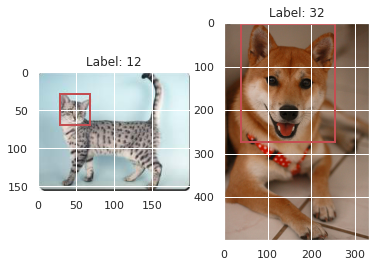

In [ ]:
if __name__ == "__main__":
  objReadInput= EDA_Util()
  objReadInput.checkClassBalance()
  objReadInput.readImages()
  objReadInput.visualizeImages()

### Inferences
- We have a total of 3671 Records(Images)
- We have a total of 37 classes and the classes are balanced , approximately 100 images per class
- We randomly displayed two images with their corresponding bounding boxes and labels 